## **Estudos de Métodos Numéricos**

Autor: Igor Gimenes Amorim

GitHub: https://github.com/IgorGimenesAmorim
Linkedin: https://www.linkedin.com/in/igmenes/

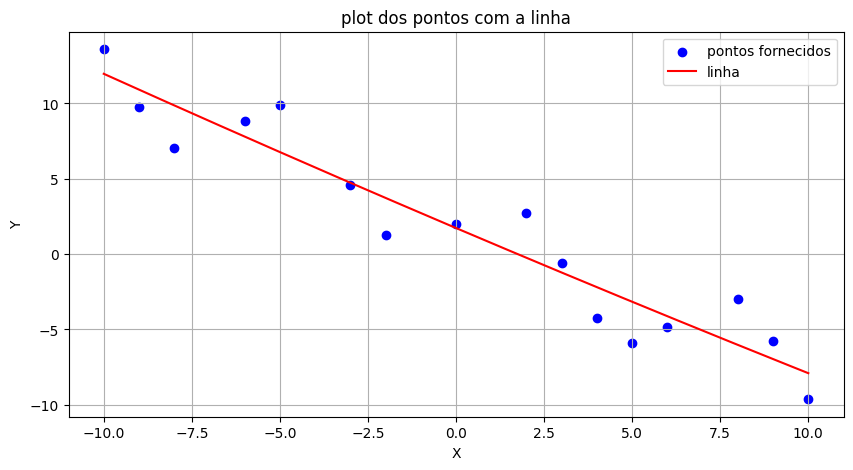

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# aqui carregamos os dados fornecidos, naturalmente, pro código realmente ser útil o ideal seria criar uma função pro usuario inserir
X = np.array([-10, -9, -8, -6, -5, -3, -2, 0, 2, 3, 4, 5, 6, 8, 9, 10])
Y = np.array([13.6, 9.76, 7.03, 8.84, 9.87, 4.57, 1.27, 2, 2.7, -0.57, -4.27, -5.87, -4.84, -3.0, -5.76, -9.63])

# aqui puxamos uma função da numpy, a polyfit q ajusta um polinomio com um grau especificado
coefficients = np.polyfit(X, Y, deg=2)  # note que o deg = 2, definimos q o polinomio é de segundo grau
polynomial = np.poly1d(coefficients) #aqui tomamos os coeficientes obtidos e transferimos pra um objeto, a variavel polynomial

# essa parte, é basicamente pra gerar uma linha no meio dos espaços a partir do que obtemos nos objetos anteriores
x_values = np.linspace(X.min(), X.max(), 400) # a funçao linspace basicamente retorna um array de x pontos
y_values = polynomial(x_values) # calcula o maior valor do polinomio, basicamente gera os pontos azuis de interesse, seria o nosso y

# aqui basicamente plotamos tudo e exibimos a imagem, vou reutilizar essa parte depois
plt.figure(figsize=(10, 5)) # definimos o tamanho da figura
plt.scatter(X, Y, color='blue', label='pontos fornecidos') #ajuda a visualizar a distribuiçao do x e y e plota os pontos de dados, define a legenda do grafico
plt.plot(x_values, y_values, color='red', label='linha') #pega os arrays que contem os valores de x e y, define a legenda do grafico tb
plt.title('plot dos pontos com a linha')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True) #coloca a gradezinha do gráfico, só pra ver melhor
plt.show()


In [ ]:
from numpy.linalg import lstsq

# carregando os valores no array, com os dados fornecidos (mesmos da pergunta anterior)
X = np.array([-10, -9, -8, -6, -5, -3, -2, 0, 2, 3, 4, 5, 6, 8, 9, 10])
Y = np.array([13.6, 9.76, 7.03, 8.84, 9.87, 4.57, 1.27, 2, 2.7, -0.57, -4.27, -5.87, -4.84, -3.0, -5.76, -9.63])

# definindo as funções de base
def g1(x):
    return x

def g2(x):
    return x**2

def g3(x):
    return x**3

# construindo a matriz com as funções de base
G = np.vstack([g1(X), g2(X), g3(X)]).T

# encontrando os coeficientes a1, a2, a3
a1, a2, a3 = lstsq(G, Y, rcond=None)[0] #lstsq é uma funçao especifica da numpy pra minimos quadrados, rcond especifica um valor de corte, no caso, nao coloquei nenhum
a1, a2, a3


(-0.973287799181204, 0.027824136880073555, -0.00017301504398144207)

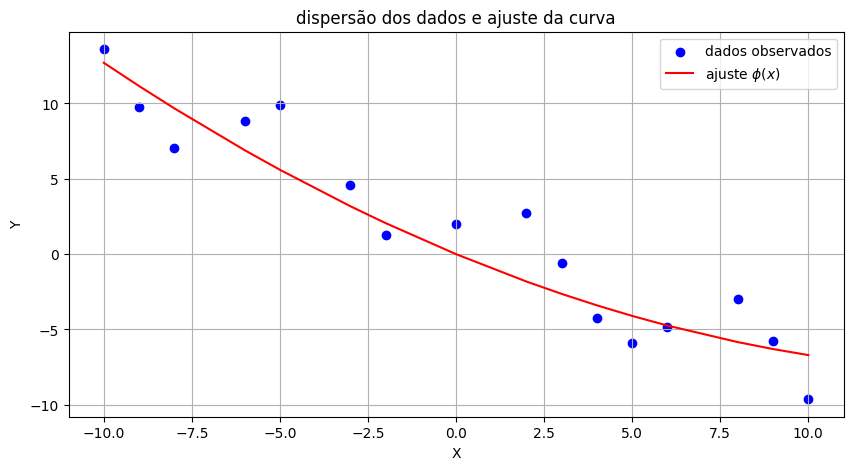

In [ ]:
# mesmos dados
X = np.array([-10, -9, -8, -6, -5, -3, -2, 0, 2, 3, 4, 5, 6, 8, 9, 10])
Y = np.array([13.6, 9.76, 7.03, 8.84, 9.87, 4.57, 1.27, 2, 2.7, -0.57, -4.27, -5.87, -4.84, -3.0, -5.76, -9.63])

# mesma funçao
def g1(x):
    return x

def g2(x):
    return x**2

def g3(x):
    return x**3

# montando as matrizes de novo
G = np.vstack([g1(X), g2(X), g3(X)]).T

# usando a funçao citada e utilizada anteriormente, a lstsq da numpy, pra mínimos quadrados
a1, a2, a3 = lstsq(G, Y, rcond=None)[0]

# arredondando os coeficientes pra dois digitos significativos, dá pra usar essa função pra plotar nos gráficos de uma maneira mais limpa também
a1_rounded = np.round(a1, 2) #round também vem da numpy, a segunda variavel determina o numero de digitos
a2_rounded = np.round(a2, 2)
a3_rounded = np.round(a3, 2)

# função de ajuste com base nos coeficientes encontrados
def phi(x):
    return a1_rounded * g1(x) + a2_rounded * g2(x) + a3_rounded * g3(x)

# valores ajustados usando a função anterior, a phi
Y_fit = phi(X)

# usando o código de plot, novamente.
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='blue', label='dados observados')
plt.plot(X, Y_fit, color='red', label='ajuste $\\phi(x)$')
plt.title('dispersão dos dados e ajuste da curva')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-15-74fc134d5c22>:25: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  denominator = np.math.factorial(len(x_points))


Tabela de valores:
[[0.8        0.69670671]
 [1.         0.54030231]
 [1.1        0.45359612]
 [1.3        0.26749883]]

Coeficientes do polinômio interpolador:
[ 0.14410138 -0.7013601   0.12881879  0.96874223]

Estimativa pra cos(1.07):
0.4801215500633945

Limite superior pro erro:
5.433750000000009e-06


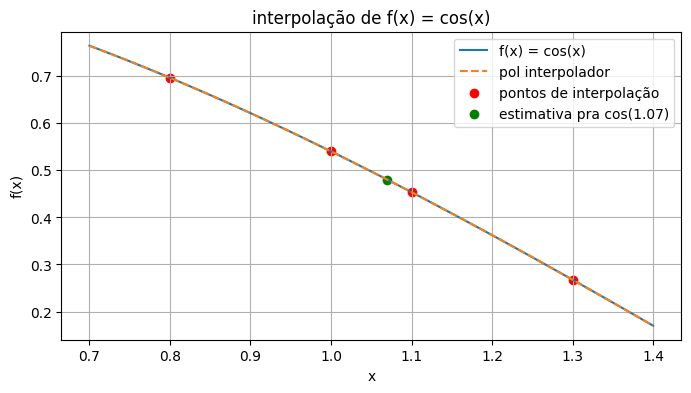

In [ ]:
def f(x):
    return np.cos(x)

# pontos dados pra a interpolação
x_points = np.array([0.8, 1.0, 1.1, 1.3])
y_points = f(x_points)

# criando a tabela pra função f(x) = cos(x)
table = np.column_stack((x_points, y_points))

# obtendo o polinômio interpolador usando o método de Lagrange
polynomial_coefficients = np.polyfit(x_points, y_points, len(x_points) - 1) #usamos a polyfit pra fazer o min quad. len(x_points) define q passará pelos pontos fornecidos
polynomial = np.poly1d(polynomial_coefficients) #depois que encontramos os coef. aqui a gente só cria um objeto, o polynomial q representa o polinomio interpolador

# calculando a estimativa pro cos(1.07)
cos_estimation = polynomial(1.07)

# calculando o produto dos termos (x - xi) pra x = 1.07, usando np também e transferindo pra um objeto
error_term_product = np.prod([abs(1.07 - xi) for xi in x_points])

# a derivada de ordem 4 de f(x) = cos(x) é cos(x) novamente, o valor máximo é 1
# fatorial pro denominador, note que também foi usada a np
denominator = np.math.factorial(len(x_points))

# limite superior do erro, usando os objetos anteriores
error_bound = error_term_product / denominator

# imprimindo a tabela, coeficientes do polinômio, estimativa de cos(1.07) e o limite superior do erro
print("Tabela de valores:")
print(table)
print("\nCoeficientes do polinômio interpolador:")
print(polynomial_coefficients)
print("\nEstimativa pra cos(1.07):")
print(cos_estimation)
print("\nLimite superior pro erro:")
print(error_bound)

# plotando tudo
x_range = np.linspace(0.7, 1.4, 100)
plt.figure(figsize=(8, 4))
plt.plot(x_range, f(x_range), label='f(x) = cos(x)')
plt.plot(x_range, polynomial(x_range), label='pol interpolador', linestyle='--')
plt.scatter(x_points, y_points, color='red', label='pontos de interpolação')
plt.scatter(1.07, cos_estimation, color='green', label='estimativa pra cos(1.07)')
plt.title('interpolação de f(x) = cos(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.optimize import curve_fit

# dados fornecidos
x_data = np.array([1, 2, 3, 4])
y_data = np.array([2, 5, 10, 17])

# definindo a função não polinomial pro ajuste
def model(x, a, b, c):
    return a * np.exp(b * x) + c

# utilizando curve_fit para ajustar os parâmetros da função model aos dados iniciais
# o curve_fit usa min. quadrados não-lineares pra ajustar a função aos dados
parameters, covariance = curve_fit(model, x_data, y_data)

# extraindo os resultados da função curve_fit
a, b, c = parameters
print(f"O parâmetro a é: {a}")
print(f"O parâmetro b é: {b}")
print(f"O parâmetro c é: {c}")


O parâmetro a é: 4.309631946147937
O parâmetro b é: 0.4020843584312976
O parâmetro c é: -4.499163227615183


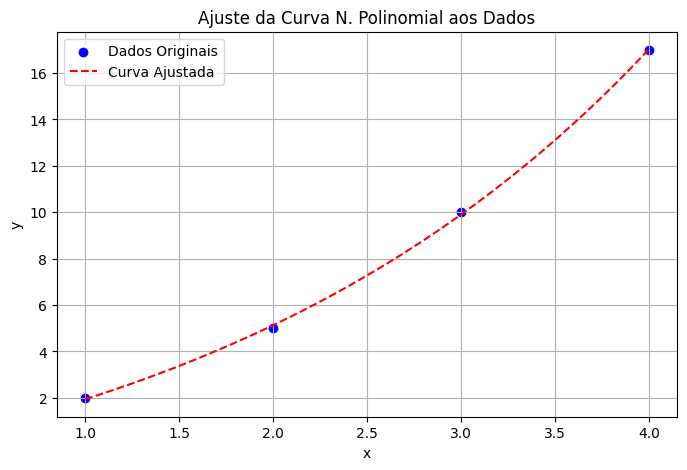

Parâmetro a: 4.309631946147937
Parâmetro b: 0.4020843584312976
Parâmetro c: -4.499163227615183
Soma dos quadrados dos resíduos: 0.031490330701000664


In [ ]:
# dados fornecidos
x_data = np.array([1, 2, 3, 4])
y_data = np.array([2, 5, 10, 17])

# definindo a função não polinomial pro ajuste
def model(x, a, b, c):
    return a * np.exp(b * x) + c

# utilizando novamente curve_fit pra ajustar os parâmetros da função model aos dados iniciais
parameters, covariance = curve_fit(model, x_data, y_data) #curve_fit usa minimos quadrados tb

# determinando os resíduos (diferença entre os dados e o modelo)
residuals = y_data - model(x_data, *parameters)
ss_res = np.sum(residuals**2)

# determinando os dados pra curva ajustada
x_fit = np.linspace(x_data.min(), x_data.max(), 100)
y_fit = model(x_fit, *parameters)

# plot do conjunto de dados original e da curva ajustada
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, color='blue', label='Dados Originais')
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Curva Ajustada')
plt.title('Ajuste da Curva N. Polinomial aos Dados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# resíduos
a, b, c = parameters
print(f"Parâmetro a: {a}")
print(f"Parâmetro b: {b}")
print(f"Parâmetro c: {c}")
print(f"Soma dos quadrados dos resíduos: {ss_res}")


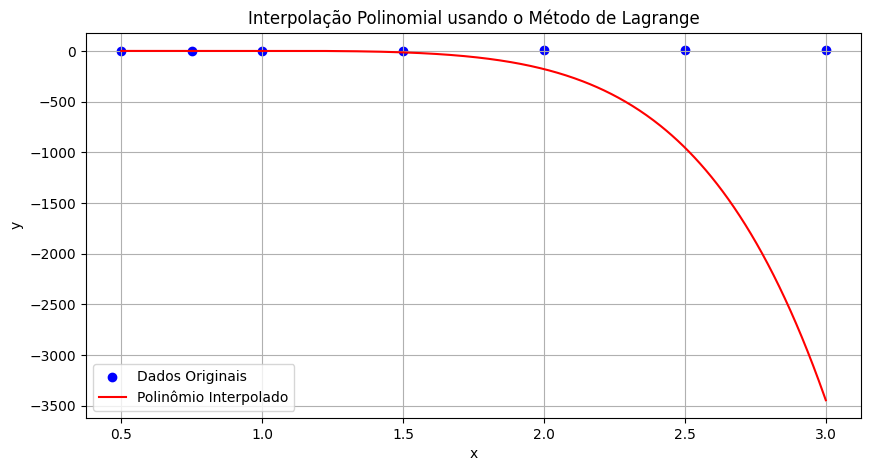

In [ ]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

# dados iniciais
x_points = np.array([0.5, 0.75, 1, 1.5, 2.0, 2.5, 3.0])
y_points = np.array([-2.8, -0.6, 1, 3.2, 4.8, 6.0, 7.0])

# usando o metodo de lagrange, da biblioteca scipy
polynomial_lagrange = lagrange(x_points, y_points)
# convertendo os x pra uma forma mais adequada
polynomial_coefficients = Polynomial(polynomial_lagrange).coef

# gerando os pontos da curva de interpolação
x_interp = np.linspace(x_points.min(), x_points.max(), 500)
y_interp = np.polyval(polynomial_coefficients[::-1], x_interp)

# plot do gráfico de dispersão dos dados e o polinômio interpolado
plt.figure(figsize=(10, 5))
plt.scatter(x_points, y_points, color='blue', label='Dados Originais')
plt.plot(x_interp, y_interp, color='red', label='Polinômio Interpolado')
plt.title('Interpolação Polinomial usando o Método de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
